In [29]:
# %load show_plot.py
import matplotlib.pyplot as plt

def show_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [11]:
# import numpy as np
# from keras.datasets import imdb
# from keras import preprocessing
# from keras import models
# from keras import layers
# from keras import optimizers

# max_length = 10000
# max_len = 20
# (x_train, y_train), (x_test, y_test) = imdb.load_data()
# x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
# x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# model = models.Sequential()
# model.add(layers.Embedding(max_length, 8, input_length = max_len))
# model.add(layers.Flatten())
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['acc'])

# print(model.summary())

# history = model.fit(x_train, y_train, epochs=10, batch_size = 32, validation_split=0.5)
# show_plot(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 12500 samples, validate on 12500 samples
Epoch 1/10


InvalidArgumentError: indices[1,12] = 15023 is not in [0, 10000)
	 [[{{node embedding_2/embedding_lookup}}]]

In [11]:
import numpy as np
from keras.datasets import imdb
from keras import preprocessing
from keras import models
from keras import layers
from keras import optimizers
import os

labels = []
texts = []

max_len = 100
train_samples = 2000
validation_samples =10000
max_words = 10000

#load imdb data 
dataset_path = './dataset/aclImdb/train'
for label_type in ['neg', 'pos']:
    temp_path = os.path.join(dataset_path, label_type)
    for file_name in os.listdir(temp_path):
        if file_name[-4:]=='.txt':
            with open( os.path.join(temp_path, file_name), 'r') as file:
                texts.append(file.read())
                if label_type=='neg':
                    labels.append(0)
                else:
                    labels.append(1)

tolkenizer = preprocessing.text.Tokenizer(max_words)
tolkenizer.fit_on_texts(texts)

#create a sequence which contains index of the words
sequences = tolkenizer.texts_to_sequences(texts)

print("sequences completed")

word_index = tolkenizer.word_index

data = preprocessing.sequence.pad_sequences(sequences, max_len)

#convert labels to numpy array
labels = np.asarray(labels)

#shuffle the data
random_indices = np.arange(data.shape[0])

np.random.shuffle(random_indices)

data = data[random_indices]
labels = labels[random_indices]

#split the data to training (200 samples ) and validating (10000 samples )
x_train = data[:train_samples]
y_train = labels[:train_samples]

x_validate = data[train_samples:validation_samples]
y_validate = labels[train_samples:validation_samples]

print("extracted train and validate dataset")

#load the GloVe
path_to_glove = './dataset/glove.6B'
glove_file='glove.6B.100d.txt'

embeddings = {}

with(open(os.path.join(path_to_glove, glove_file))) as file:
    for line in file.readlines():
        coefficients = []
        values = line.strip().split(" ")
        word = (values[0])
        coefficients = values[1:]
        embeddings[word] = coefficients
        

print("embedding extracted")

sequences completed
extracted train and validate dataset
embedding extracted


In [21]:
embedding_dim = len(embeddings.get('the'))
embedding_matrix = np.zeros(shape=(max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# index 0 is a holder since word_index starts with 'the':1

print(embedding_matrix[1])

    

[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.27062 ]

In [33]:
#build the model
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length = max_len))

model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_data=(x_validate, y_validate))

model.save('pre_trained_glove.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________
Train on 200 samples, validate on 9800 samples
Epoch 1/20
200/200 [==============================] - 1s 3ms/step - loss: 2.0955 - acc: 0.5400 - val_loss: 0.8228 - val_acc: 0.5071
Epoch 2/20
200/200 [==============================] - 0s 1ms/step - loss: 0.683

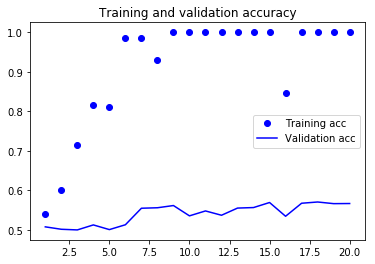

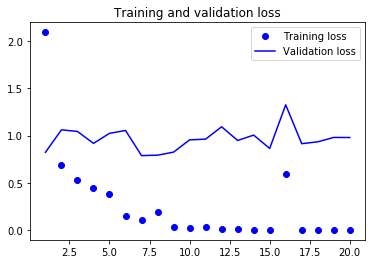

In [34]:
show_plot(history)

In [37]:
test_dir = './dataset/aclImdb/test'
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tolkenizer.texts_to_sequences(texts)
x_test = preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)
y_test = np.asarray(labels)

In [38]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 24us/step


[0.989526962928772, 0.5642]